In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [2]:
X = np.load('archive/X.npy')
y = np.load('archive/Y.npy')

In [3]:
X = X.reshape(-1,64,64,1)

print("X Shape:",X.shape)
print("Y Shape:",y.shape)

X Shape: (2062, 64, 64, 1)
Y Shape: (2062, 10)


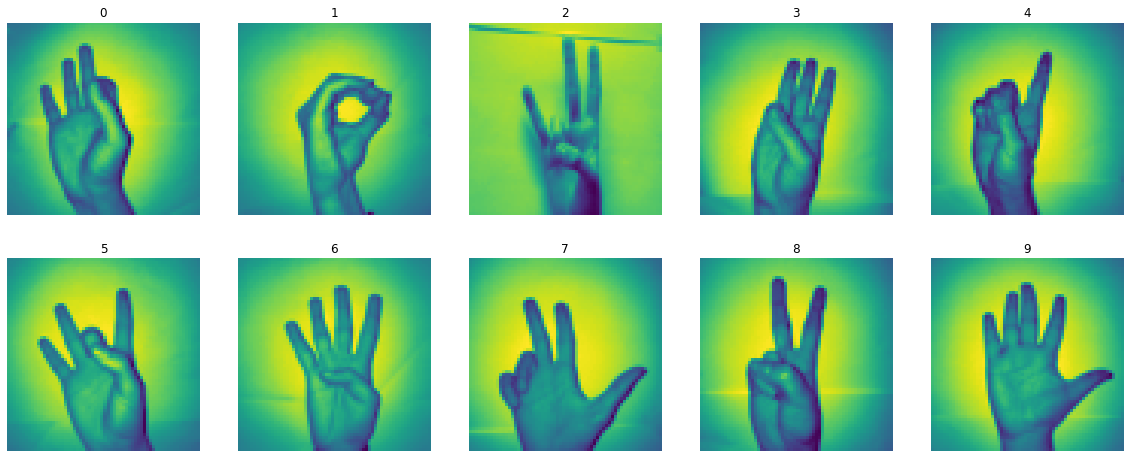

In [4]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [5]:
X_organized = np.concatenate((X[204:409,:],
                              X[822:1028,:],
                              X[1649:1855,:],
                              X[1443:1649,:],
                              X[1236:1443,:],
                              X[1855:2062,:],
                              X[615:822,:],
                              X[409:615,:],
                              X[1028:1236,:],
                              X[0:204,:]),axis = 0)

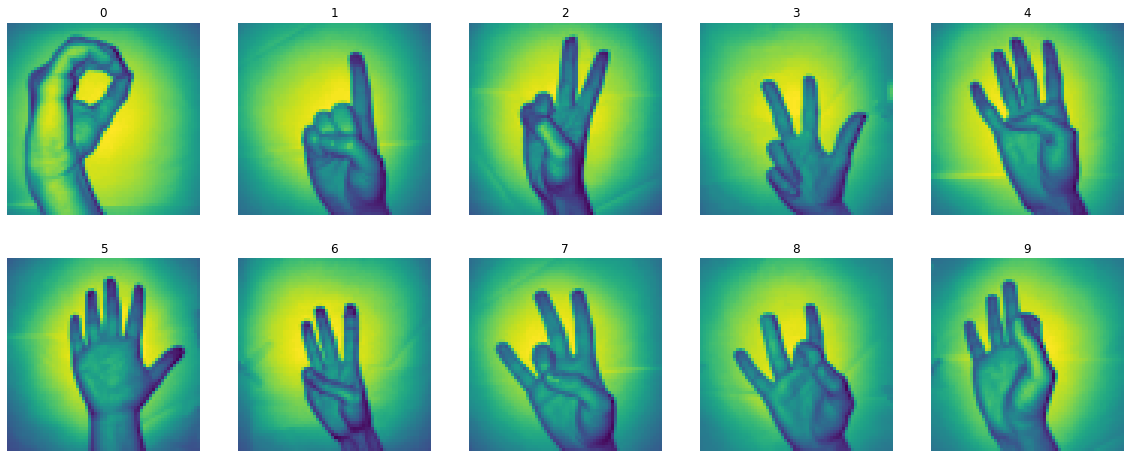

In [6]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X_organized[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_organized,y,test_size = 0.2,random_state = 42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1649, 64, 64, 1)
x_test shape: (413, 64, 64, 1)
y_train shape: (1649, 10)
y_test shape: (413, 10)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
def show_new_samples(new_images):
    plt.figure(figsize=(20,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        image = new_images.next()
        plt.imshow(image[0].reshape(64,64))
        plt.axis('off')
    
    plt.show()

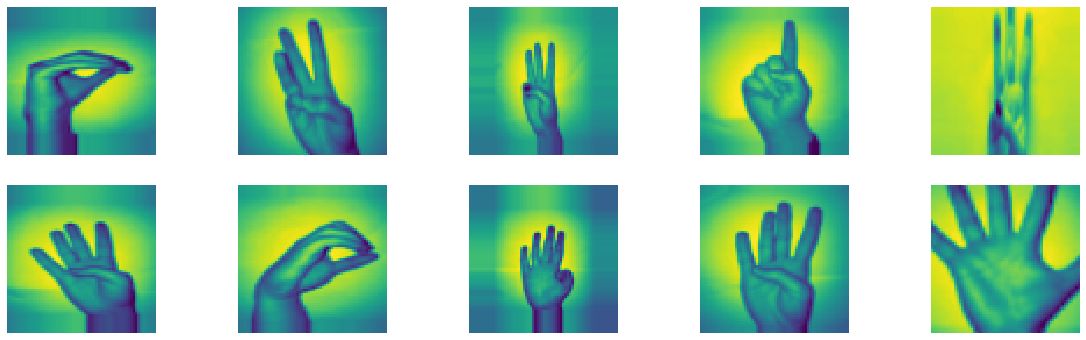

In [10]:
#Changin zoom level
datagen = ImageDataGenerator(zoom_range = 0.5)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

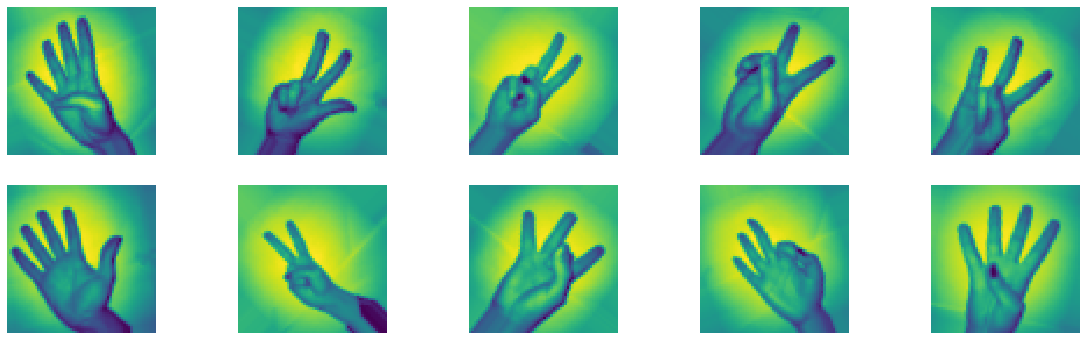

In [11]:
# Changing rotaion 
datagen = ImageDataGenerator(rotation_range = 45)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

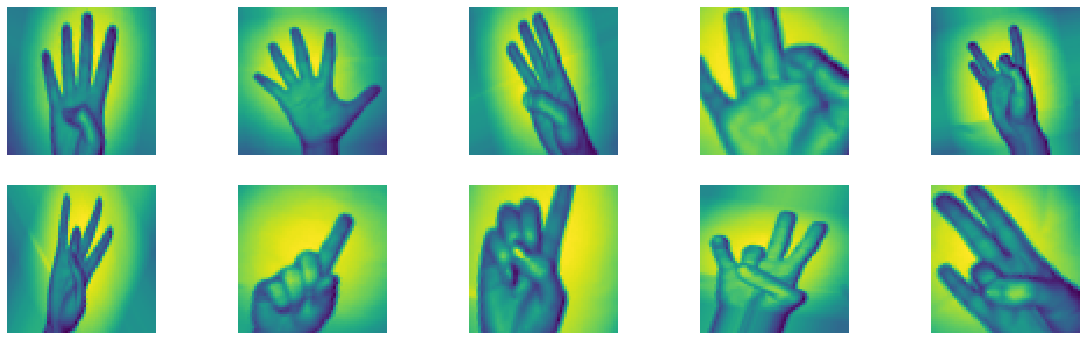

In [12]:
# Changing rotaion, zoom 
datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
new_images = datagen.flow(x_train,batch_size = 1)
show_new_samples(new_images)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
#building model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (9,9),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

In [15]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
datagen.fit(x_train)

In [17]:
history=model.fit(datagen.flow(x_train,y_train, batch_size=250),epochs = 100, validation_data = (x_test,y_test))

Train for 7 steps, validate on 413 samples
Epoch 1/100
7/7 [==============================] - 11s 2s/step - loss: 2.3082 - accuracy: 0.0940 - val_loss: 2.3040 - val_accuracy: 0.0920
Epoch 2/100
7/7 [==============================] - 10s 1s/step - loss: 2.3018 - accuracy: 0.1061 - val_loss: 2.3057 - val_accuracy: 0.0775
Epoch 3/100
7/7 [==============================] - 10s 1s/step - loss: 2.3022 - accuracy: 0.1055 - val_loss: 2.3061 - val_accuracy: 0.0847
Epoch 4/100
7/7 [==============================] - 10s 1s/step - loss: 2.3003 - accuracy: 0.0976 - val_loss: 2.3091 - val_accuracy: 0.0920
Epoch 5/100
7/7 [==============================] - 10s 1s/step - loss: 2.3012 - accuracy: 0.1013 - val_loss: 2.3038 - val_accuracy: 0.0896
Epoch 6/100
7/7 [==============================] - 10s 1s/step - loss: 2.2992 - accuracy: 0.1025 - val_loss: 2.3035 - val_accuracy: 0.0944
Epoch 7/100
7/7 [==============================] - 9s 1s/step - loss: 2.2988 - accuracy: 0.1086 - val_loss: 2.2976 - val_ac

In [26]:
model.save('trained_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: trained_model/assets
